In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Config.
targets = [
    'lst_day_mean',
    'lst_day_max',
    'lst_night_mean',
    'lst_night_max',
]
n_holdouts = 100

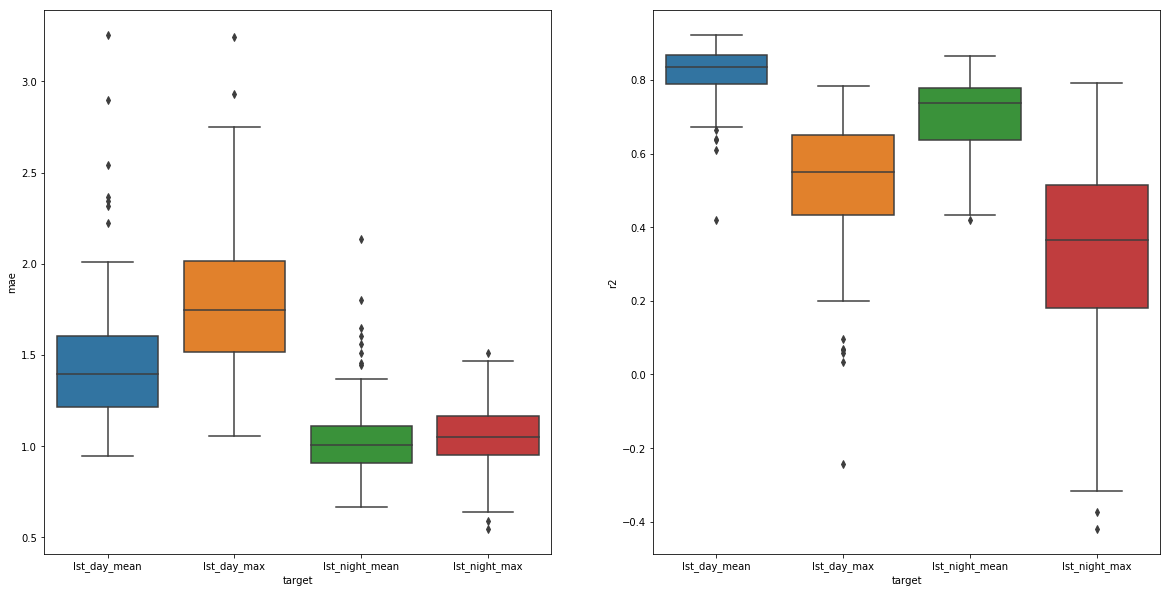

In [3]:
# Metrics.
dfs = []
for target in targets:
    path = f'../../../data/cnn/metrics_500_{target}.csv'
    df = pd.read_csv(path)
    df['target'] = target
    dfs.append(df)
    
df = pd.concat(dfs)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='target', y='mae', data=df, ax=axes[0])
sns.boxplot(x='target', y='r2', data=df, ax=axes[1])

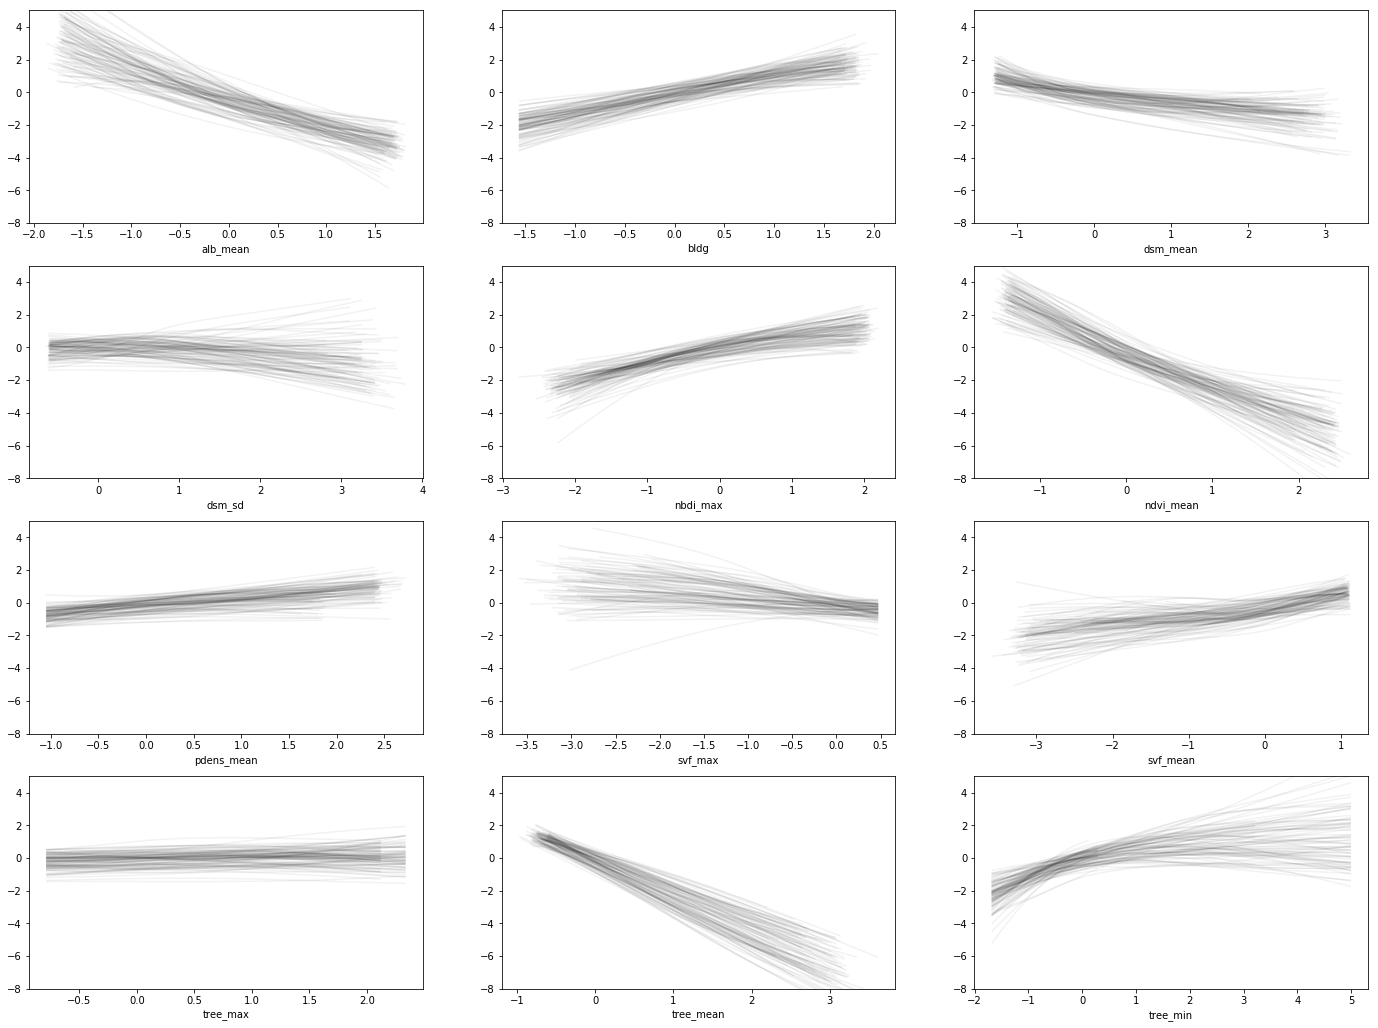

In [4]:
# Partial dependence.
df = pd.read_csv('../../../data/cnn/partial_dependence_500_lst_day_mean.csv')

# Get the names of the features.
cols = df.columns.tolist()
cols.remove('i_holdout')
cols.remove('x_index')
cols.remove('x_lcov_11')
cols.remove('y_lcov_11')
features = list(sorted(set(c[2:] for c in cols)))

feature = features[0]
fig, axes = plt.subplots(4, 3, figsize=(24, 18))

for feature, ax in zip(features, axes.flatten()):
    for i_holdout in range(n_holdouts):
        df_holdout = df[df.i_holdout == i_holdout]
        x = df_holdout['x_' + feature]
        y = df_holdout['y_' + feature]
        ax.plot(x, y, alpha=0.05, c='k')
        ax.set_xlabel(feature)
        ax.set_ylim([-8, 5])